In [1]:
# Lee DataFrame como archivo de pandas
import pandas as pd
df = pd.read_csv('data/DATOS_TODOS.csv')

In [2]:
# Muestra primeros 5 registros
df.head()

,DTBZ,RAC,PACIENTE,REGION,ESTADO
0,0.89896,1.4471,1,1,1
1,0.86748,1.5136,1,1,1
2,0.93476,1.7063,1,1,1
3,0.90622,1.7889,1,1,1
4,0.78113,1.7905,1,1,1


In [3]:
# define variables 'X' y 'y'
feature_cols = ['DTBZ']
X = df[feature_cols]
y = df.ESTADO

In [4]:
# Divide 'X' y 'y' en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# Entrena un modelo de Regresión Logística en el conjunto de entrenamiento
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Aprende la relación entre el conjunto de entrada y salida del conjunto de entrenamiento
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Realiza predicciones de clase para el conjunto de pruebas
y_pred_class = logreg.predict(X_test)

#Muestra métricas del clasificador
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.83      0.76      0.79      1366
          1       0.89      0.92      0.90      2788

avg / total       0.87      0.87      0.87      4154



**Precisión de Clasificación:** Porcentaje de predicciones correctas

In [7]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.869041887337506


Es importante comparar la métrica de evaluación **Accuracy** con **Null Accuracy** que es la precisión que se podría lograr al siempre predecir la clase mas frecuente en el conjunto de prueba.

In [8]:
# Examina la distribución de clases del conjunto de pruebas
y_test.value_counts()

1    2788
0    1366
Name: ESTADO, dtype: int64

In [9]:
# Calcula el porcentaje de 'unos' presentes en el conjunto
y_test.mean()

0.6711603273952816

In [10]:
# Calcula el porcentaje de 'ceros' presentes en el conjunto
1 - y_test.mean()

0.32883967260471836

In [11]:
# Calcula 'Null accuracy' (En problemas binarios)
max(y_test.mean(), 1 - y_test.mean())

0.6711603273952816

Dado que solo se tienen dos clases, el valor de la clase con mayor porcentaje será el valor de *Null Accuracy*

Ya que 67%>32%, *Null Accuracy* se representa en el conjunto de 'Unos'. Un modelo que predice si un paciente tiene Parkinson será correcto 67% de las veces

In [12]:
# Calcula 'Null accuracy' (Para problemas de clasificación multi-clase)
y_test.value_counts().head(1) / len(y_test)

1    0.67116
Name: ESTADO, dtype: float64

Comparación de valores de respuesta **verdaderos** y **predicciones**

In [13]:
# Muestra las primeras 25 respuestas verdaderas y predichas
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0]
Pred: [1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0]


## Matriz de Confusión

Describe el rendimiento del modelo de clasificación.



In [14]:
# IMPORTANTE: Pareja ordenada (valores verdaderos, valores predichos)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1035  331]
 [ 213 2575]]


**Terminología**

- **Verdadero Positivo (VP):** Predice *correctamente* paciente *con* Parkinson
- **Verdadero Negativo (VN):** Predice *correctamente* paciente *sin* Parkinson
- **Falso Positivo (FP):** Predice *incorrectamente* paciente *con* Parkinson
- **Falso Negativo (FN):** Predice *incorrectamente* paciente *sin* Parkinson

In [15]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
VP = confusion[1, 1]
VN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Metricas obtenidas de la matriz de confusion

**Precisión de Clasificación:** Frecuencia con la que la clasificación es correcta.

In [16]:
print((VP + VN) / float(VP + VN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.869041887337506
0.869041887337506


**Error de Clasificación:** ¿Con qué frecuencia es incorrecto el clasificador?


- También conocido como "Tasa de clasificación errónea"

In [17]:
print((FP + FN) / float(VP + VN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.130958112662494
0.13095811266249402


**Sensibilidad:** Cuando el valor real es positivo, ¿Con qué frecuencia es correcta la predicción?
- ¿Cuan "sensible" es el clasificador para detectar casos positivos?

In [18]:
print(VP / float(VP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.9236011477761836
0.9236011477761836


**Especificidad:** ¿Cuando el valor real es negativo, ¿con qué frecuencia es correcta la predicción?

- ¿Qué tan "específico" (o "selectivo") es el clasificador para predecir casos positivos?

In [19]:
print(VN / float(VN + FP))

0.7576866764275256


**Tasa Falso Positivo:** Cuando el valor real es negativo, ¿Con qué frecuencia es incorrecta la predicción?

In [20]:
print(FP / float(VN + FP))

0.24231332357247437


**Precisión:** Cuando se predice un valor positivo, ¿Con qué frecuencia es correcta la predicción?

- ¿Qué tan preciso es el clasificador al predecir casos positivos?

In [21]:
print(VP / float(VP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.8860977288368892
0.8860977288368892


In [22]:
# Muestra la predicción de las primeras 10 respuestas
logreg.predict(X_test)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
# Muestra las primeras 10 probabilidades predichas de pertenencia a clases
logreg.predict_proba(X_test)[0:10, :]

array([[0.44626371, 0.55373629],
       [0.0312798 , 0.9687202 ],
       [0.02787441, 0.97212559],
       [0.09869622, 0.90130378],
       [0.07211954, 0.92788046],
       [0.0266257 , 0.9733743 ],
       [0.04118089, 0.95881911],
       [0.01989126, 0.98010874],
       [0.24120929, 0.75879071],
       [0.08949164, 0.91050836]])

In [24]:
# Muestra las primeras 10 probabilidades predichas para la clase 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.55373629, 0.9687202 , 0.97212559, 0.90130378, 0.92788046,
       0.9733743 , 0.95881911, 0.98010874, 0.75879071, 0.91050836])

In [25]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

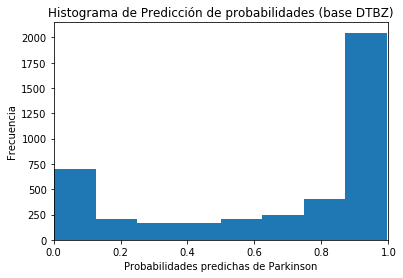

In [28]:
# histograma de probabilidades predichas
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histograma de Predicción de probabilidades (base DTBZ)')
plt.xlabel('Probabilidades predichas de Parkinson')
plt.ylabel('Frecuencia')
plt.savefig('histo_RL_DTBZ.png')

**Disminuye** el umbral para predecir el Parkinson con el fin de **aumentar la sensibilidad** del clasificador

In [29]:
# predice Parkinson si la probabilidad pronosticada es mayor a 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [30]:
# Muestra las primeras 10 probabilidades predichas
y_pred_prob[0:10]

array([0.55373629, 0.9687202 , 0.97212559, 0.90130378, 0.92788046,
       0.9733743 , 0.95881911, 0.98010874, 0.75879071, 0.91050836])

In [31]:
# Matriz de confusión previa (umbral por defecto 0.5)
print(confusion)

[[1035  331]
 [ 213 2575]]


In [32]:
# Nueva matriz de confusión (Umbral de 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 891  475]
 [ 100 2688]]


In [33]:
# Ha incrementado la Sensibilidad (Solía ser 0.92)
print(2688 / float(2688 + 100))

0.9641319942611191


In [34]:
# Ha disminuído la Especificidad (Solía ser 0.75)
print(891 / float(891 + 475))

0.6522693997071742


**Conclusión:**

- El **0.5 de Umbral** es usado por defecto (para problemas binarios) para convertir las probabilidades predichas en predicciones de clases
- El Umbral puede ser **ajustado** para incrementar o disminuír la Sensibilidad o Especificidad
- La Sensibilidad y Especificidad tienen una **relación inversa**

## Curvas ROC y Área bajo la curva



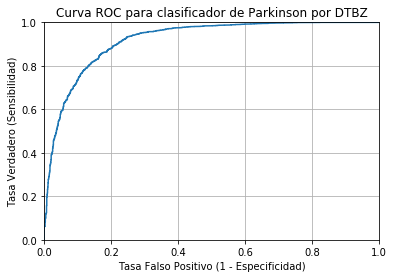

In [36]:
# IMPORTANTE: Pareja ordenada (valores reales, probabilidades predichas)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para clasificador de Parkinson por DTBZ')
plt.xlabel('Tasa Falso Positivo (1 - Especificidad)')
plt.ylabel('Tasa Verdadero (Sensibilidad)')
plt.grid(True)
plt.savefig('ROC_RLN_DTBZ')

- La curva ROC auxilia en la **elección del umbral** que equilibra la sensibilidad y la especificidad de manera que tenga sentido para un contexto particular

In [36]:
def evaluate_threshold(threshold):
    print('Sensitividad:', tpr[thresholds > threshold][-1])
    print('Especificidad:', 1 - fpr[thresholds > threshold][-1])

In [37]:
evaluate_threshold(0.5)

Sensitividad: 0.9236011477761836
Especificidad: 0.7576866764275256


In [38]:
evaluate_threshold(0.3)

Sensitividad: 0.9641319942611191
Especificidad: 0.6522693997071742


In [39]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9191479746917873


In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.9155167446446881

In [44]:
# save confusion matrix and slice into four pieces
confusion2 = metrics.confusion_matrix(y_test, y_pred_class)
VP2 = confusion2[1, 1]
VN2 = confusion2[0, 0]
FP2 = confusion2[0, 1]
FN2 = confusion2[1, 0]

In [45]:
print((VP2 + VN2) / float(VP2 + VN2 + FP2 + FN2))

0.8615792007703419
